<a href="https://colab.research.google.com/github/Zainab0325/CodSoft-Tasks/blob/main/T1%7CCodsoft.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***CODSOFT TASK 1***

***TITANIC SURVIVAL PREDICTION***


**INITIAL SETUP**

In [ ]:
!pip install -U kaleido

In [ ]:
!pip install scikit-learn

In [ ]:
!pip install scikit-learn pandas matplotlib seaborn kaggle

In [ ]:
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from collections import Counter
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import Perceptron
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [ ]:
!pip install catboost
from catboost import CatBoostClassifier

In [ ]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
#kaggle datasets download -d yasserh/titanic-dataset

In [ ]:
!kaggle datasets list

ref                                                             title                                               size  lastUpdated          downloadCount  voteCount  usabilityRating  
--------------------------------------------------------------  -------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
amanbarthwal/steam-store-data                                   Steam Store Data                                     6MB  2024-05-25 06:23:06            921         27  1.0              
khushikhushikhushi/imdb-top-rated-tv-series-dataset             IMDb Top-Rated TV Series Dataset                    73KB  2024-05-25 19:22:33            571         22  1.0              
kanchana1990/vehicle-dataset-2024                               Vehicle Dataset 2024                               308KB  2024-05-29 20:02:30            991         35  1.0              
shreyanshverma27/online-sales-dataset-popular-marketplace-data  O

In [ ]:
data = pd.read_csv('Titanic-Dataset.csv')

In [ ]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
 X = data.drop('Sex', axis=1)  # Features
 y = data['Survived']  # Target

In [ ]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X.shape

(891, 11)

In [ ]:
plt.style.use('fivethirtyeight')
%matplotlib inline

In [ ]:
train = pd.read_csv('Titanic-Dataset.csv')
test = pd.read_csv('Titanic-Dataset.csv')
# To know number of columns and rows
train.shape
# (891, 12)

(891, 12)

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<Axes: >

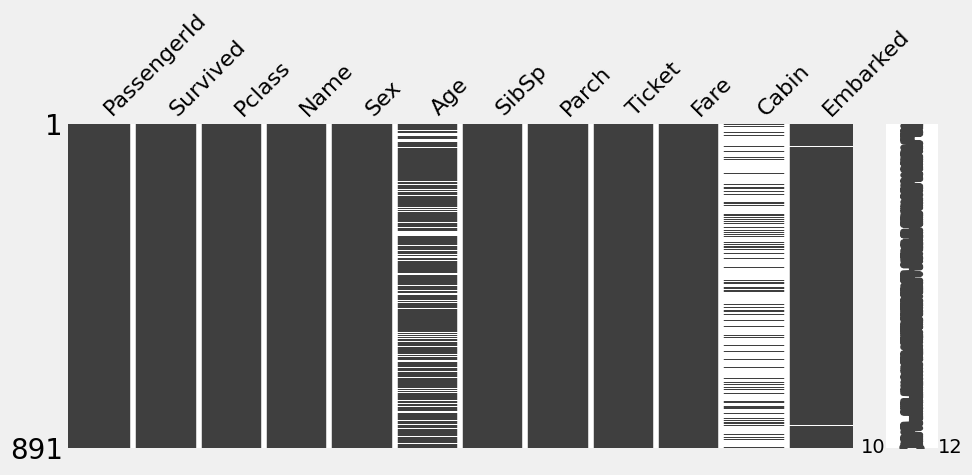

In [ ]:
msno.matrix(train, figsize=(10,4))

In [ ]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
test_df = pd.DataFrame(test)
test_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


**VISUALIZATION**

In [ ]:
train['Survived'] = train['Survived'].astype('category')

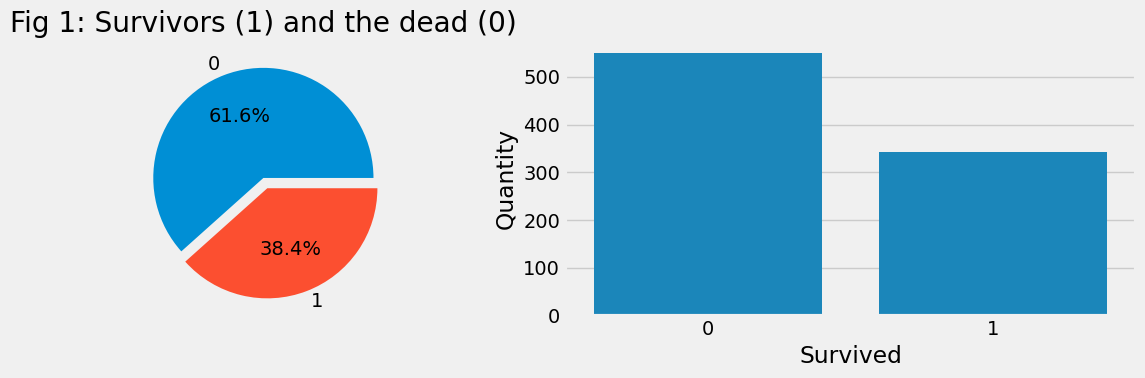

In [ ]:
f, ax = plt.subplots(1, 2, figsize=(12, 4))
train['Survived'].value_counts().plot.pie(
	explode=[0, 0.1], autopct='%1.1f%%', ax=ax[0], shadow=False)
ax[0].set_title('Fig 1: Survivors (1) and the dead (0)')
ax[0].set_ylabel('')
sns.countplot(x='Survived', data=train, ax=ax[1])
ax[1].set_ylabel('Quantity')
#ax[1].set_title('Survivors (1) and the dead (0)')
plt.style.use
plt.tight_layout()

plt.show()


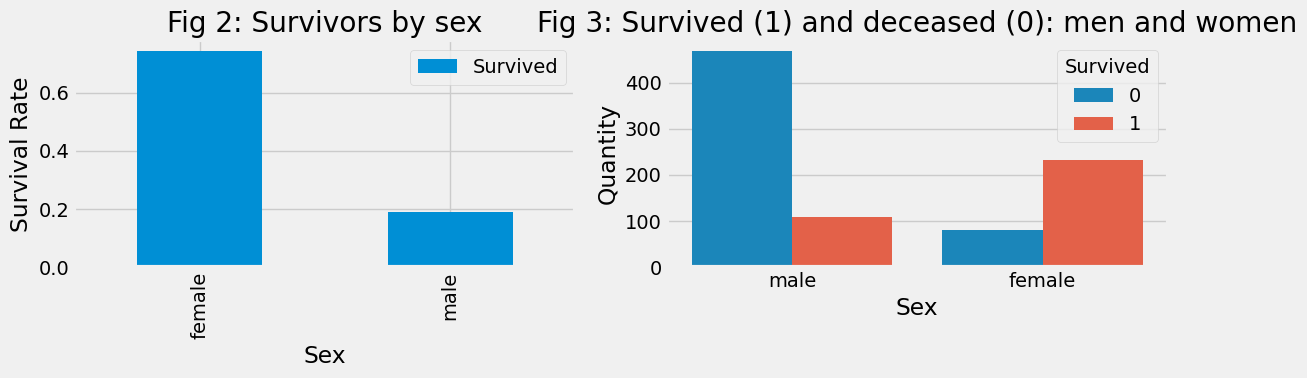

In [ ]:
f, ax = plt.subplots(1, 2, figsize=(12, 4))
train['Survived'] = train['Survived'].astype('int')
train[['Sex', 'Survived']].groupby(['Sex']).mean().plot.bar(ax=ax[0])
ax[0].set_title('Fig 2: Survivors by sex')
ax[0].set_ylabel('Survival Rate')
sns.countplot(x='Sex', hue='Survived', data=train, ax=ax[1])
ax[1].set_title('Fig 3: Survived (1) and deceased (0): men and women')
ax[1].set_ylabel('Quantity')

plt.tight_layout()

plt.show()

**FEATURE** **ENGINEERING**

drop unnecessary features and to convert string data into the numerical category for easier training

CATAGORICAL VARIABLES

In [ ]:
#catagorical var= sexcal
train['Sex'].value_counts(dropna=False)

Sex
male      577
female    314
Name: count, dtype: int64

In [ ]:
train[['Sex', 'Survived']].groupby('Sex',as_index=False).mean().sort_values(by='Survived',ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


Text(0.5, 0, 'Survivsl Probability by Gender')

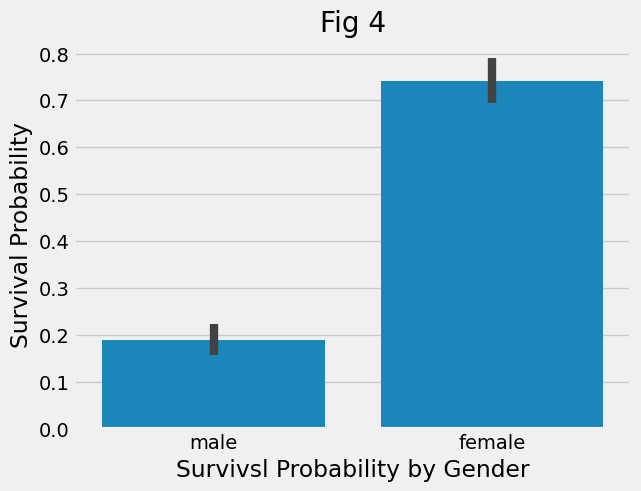

In [ ]:
#mean of survival
plt.title('Fig 4')
sns.barplot(x='Sex',y='Survived',data=train)
plt.ylabel('Survival Probability')
plt.xlabel('Survivsl Probability by Gender')

In [ ]:
#catagotical var = Pclass(ticket)
train['Pclass'].value_counts(dropna=False)

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

In [ ]:
train[['Pclass', 'Survived']].groupby('Pclass',as_index=False).mean().sort_values(by='Survived',ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


<ipython-input-29-98a728ffd839>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Pclass', y='Survived', data=train, palette=colors)


Text(0.5, 1.0, 'Fig 5')

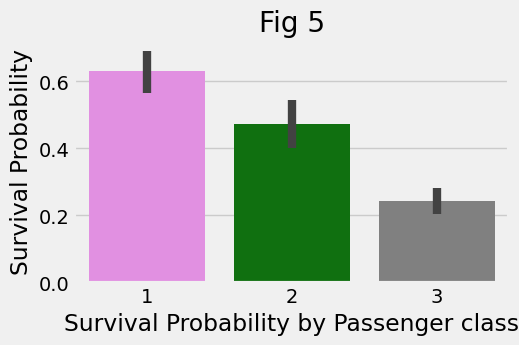

In [ ]:
#mean of survival
plt.figure(figsize=(5,3))
colors=['violet','green','grey']
sns.barplot(x='Pclass', y='Survived', data=train, palette=colors)
plt.ylabel('Survival Probability')
plt.xlabel('Survival Probability by Passenger class')
plt.title('Fig 5')

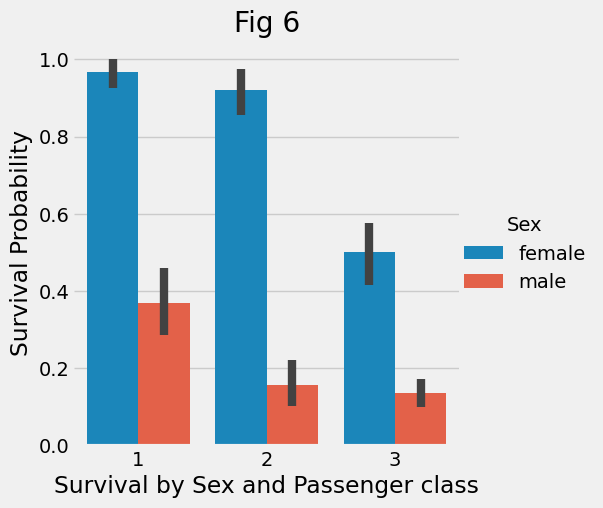

In [ ]:
# Update the code to use catplot instead of factorplot
g = sns.catplot(x='Pclass', y='Survived', hue='Sex', data=train, kind='bar')
g.despine(left=True)
plt.ylabel('Survival Probability')
plt.xlabel('Survival by Sex and Passenger class')
plt.title('Fig 6')
plt.show()

In [ ]:
#CATAGORICAL VARIABLE == EMBARKED
train['Embarked'].value_counts(dropna=False)

Embarked
S      644
C      168
Q       77
NaN      2
Name: count, dtype: int64

In [ ]:
#Survival acc to point of embarkment
train[['Embarked', 'Survived']].groupby('Embarked',as_index=False).mean().sort_values(by='Survived',ascending=False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.336957


<ipython-input-33-b0f56238206b>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Embarked', y='Survived', data=train, palette=colors)


Text(0.5, 0, 'Survival Probability by Point of Embarkation')

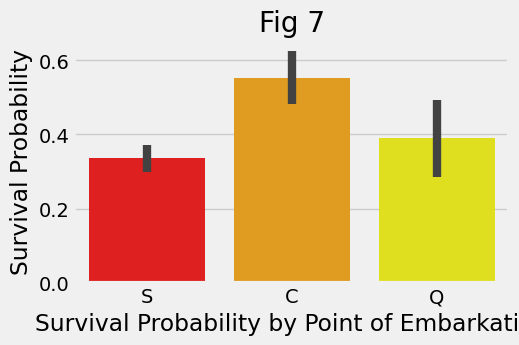

In [ ]:
plt.figure(figsize=(5,3))
plt.title('Fig 7')
colors=['red','orange','yellow']
sns.barplot(x='Embarked', y='Survived', data=train, palette=colors)
plt.ylabel('Survival Probability')
plt.xlabel('Survival Probability by Point of Embarkation')


graph implies highest survival prob at pt C

HYPOTHESIS:

P1 passg. were the majority of survivors (ref. fig 5) ==> pt C has heighest survival rate

ALTERNATIVE HYPO:

least survival prob = Passengers from class 3 (ref. fig 5)==> emb from pt S

Text(0.5, 0.98, 'Fig 7')

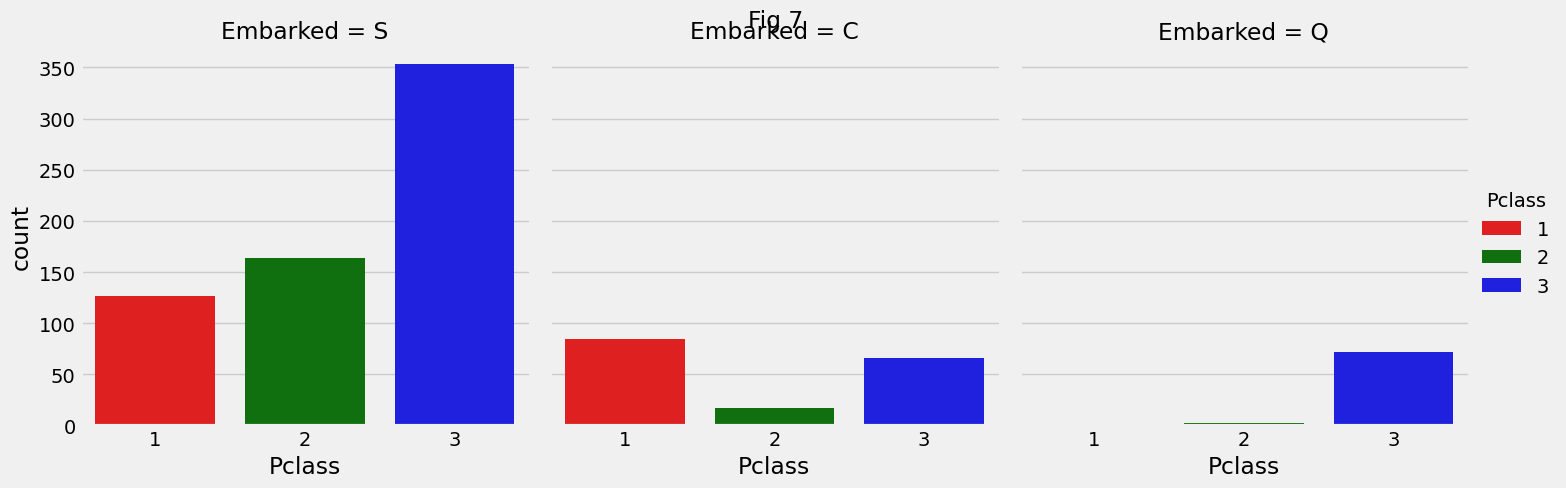

In [ ]:
#testing our hypo by Pclass vs embk
sns.catplot(x='Pclass', col='Embarked', hue='Pclass', data=train, kind='count', palette=['red', 'green', 'blue'])
plt.suptitle('Fig 7')

hence our hypo is true.

we can see at pt of emb C, P1 were the max passg.to embk and as the P1 has highest survival prob ==> loc C has the heighest survival prob and P1 were the majority of the passengers who survived

**NUMERICAL** VARIABLES

ie Age,Sib Sp,Parch ,Fare

In [ ]:
#STEP 1: deatect and remove the outliers
def detect_outliers(df, n, features):
  outlier_indices = []
  for col in features:
    Q1 = np.percentile(df[col], 25)
    Q3 = np.percentile(df[col], 75)
    IQR = Q3 - Q1
    outlier_step = 1.5 * IQR
    outlier_list_col = df[(df[col]<Q1 - outlier_step) | (df[col] >Q3 + outlier_step) ].index
    outlier_indices.extend(outlier_list_col)
  outlier_indices = Counter(outlier_indices)
  multiple_outliers = list(key for key, value in outlier_indices.items() if value > n)
  return multiple_outliers

outliers_to_drop = detect_outliers(train,2,['Age','SibSp','Parch','Fare'])
print('We will drop these {} indices: '.format(len(outliers_to_drop)),outliers_to_drop)

We will drop these 10 indices:  [27, 88, 159, 180, 201, 324, 341, 792, 846, 863]


In [ ]:
#The rows containing the outliers
train.loc[outliers_to_drop,:]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.00,C23 C25 C27,S
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.00,C23 C25 C27,S
159,160,0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.55,NaN,S
180,181,0,3,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.55,NaN,S
201,202,0,3,"Sage, Mr. Frederick",male,NaN,8,2,CA. 2343,69.55,NaN,S
324,325,0,3,"Sage, Mr. George John Jr",male,NaN,8,2,CA. 2343,69.55,NaN,S
341,342,1,1,"Fortune, Miss. Alice Elizabeth",female,24.0,3,2,19950,263.00,C23 C25 C27,S
792,793,0,3,"Sage, Miss. Stella Anna",female,NaN,8,2,CA. 2343,69.55,NaN,S
846,847,0,3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,69.55,NaN,S
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.55,NaN,S


In [ ]:
#droping the outliers
print("Before: {} rows".format(len(train)))
train = train.drop(outliers_to_drop, axis = 0).reset_index(drop=True)
#and reset index
print("After: {} rows".format(len(train)))

Before: 891 rows
After: 881 rows


<Axes: >

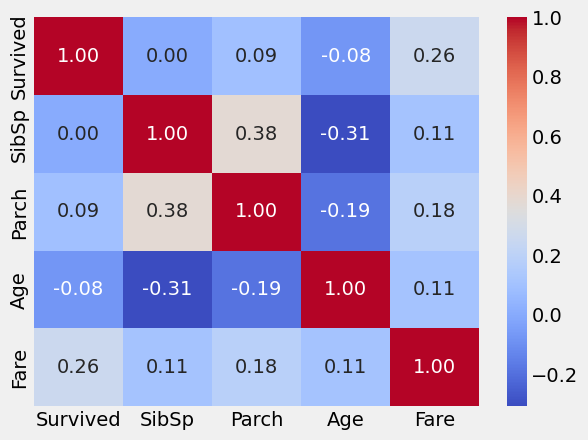

In [ ]:
#Analyses Num var wrt Target var ie Survival (ie alalysing d correlation)
sns.heatmap(train[['Survived','SibSp','Parch','Age','Fare']].corr(),annot = True, fmt = '.2f',cmap='coolwarm')
#annot -> annotation, fmt -> deci places after the pt, cmap-> diff colors of a heatmap

Fare seesm to be the only ft. that has substantial (+)corr wid Survival
P1 -> high fare->high survival prob.

In [ ]:
#N.var=SibSp
train['SibSp'].value_counts(dropna=False)

SibSp
0    608
1    209
2     28
4     18
3     13
5      5
Name: count, dtype: int64

In [ ]:
train[['SibSp', 'Survived']].groupby('SibSp',as_index=False).mean().sort_values(by='Survived',ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
4,4,0.166667
3,3,0.153846
5,5,0.000000


<ipython-input-41-a2ec67ca24cc>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='SibSp', y='Survived',data=train,palette=colors)
<ipython-input-41-a2ec67ca24cc>:4: UserWarning: 
The palette list has fewer values (5) than needed (6) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(x='SibSp', y='Survived',data=train,palette=colors)


Text(0.5, 1.0, 'Fig 9')

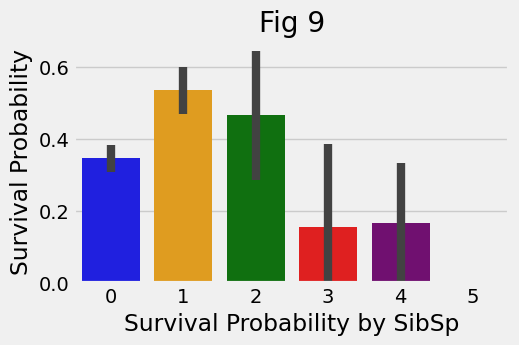

In [ ]:
#mean of survival
plt.figure(figsize=(5,3))
colors=['blue','orange','green','red','purple']
sns.barplot(x='SibSp', y='Survived',data=train,palette=colors)
plt.ylabel('Survival Probability')
plt.xlabel('Survival Probability by SibSp')
plt.title('Fig 9')

In [ ]:
#N.var=Parch
train['Parch'].value_counts(dropna=False)

Parch
0    678
1    118
2     70
5      5
3      5
4      4
6      1
Name: count, dtype: int64

In [ ]:
train[['Parch', 'Survived']].groupby('Parch',as_index=False).mean().sort_values(by='Survived',ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.542857
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


<ipython-input-44-7497ed522795>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Parch', y='Survived',data=train,palette=colors)
<ipython-input-44-7497ed522795>:4: UserWarning: 
The palette list has fewer values (6) than needed (7) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(x='Parch', y='Survived',data=train,palette=colors)


Text(0.5, 1.0, 'Fig 10')

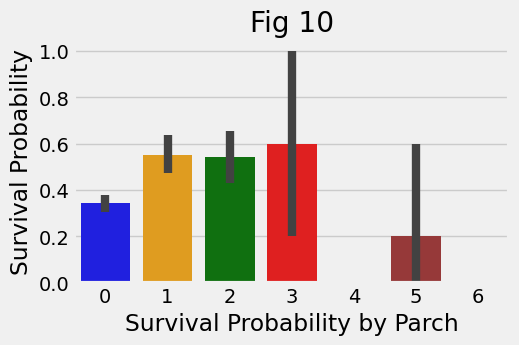

In [ ]:
#mean of survival
plt.figure(figsize=(5,3))
colors=['blue','orange','green','red','purple','brown']
sns.barplot(x='Parch', y='Survived',data=train,palette=colors)
plt.ylabel('Survival Probability')
plt.xlabel('Survival Probability by Parch')
plt.title('Fig 10')

In [ ]:
#N.var=Age (wide range of vals)
train['Age'].isnull().sum()

170

Text(0.5, 1.0, 'Fig 11: Passenger Age Distribution')

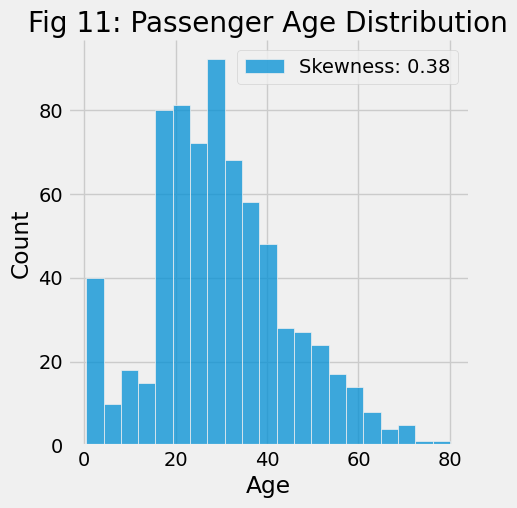

In [ ]:
sns.displot(train['Age'],label = 'Skewness: %.2f'%(train['Age'].skew()))
plt.legend(loc='best')
plt.title('Fig 11: Passenger Age Distribution')

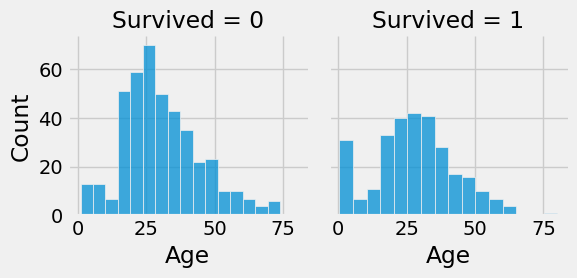

In [ ]:
#Age dist by survival
g= sns.FacetGrid(train,col='Survived')
g.map(sns.histplot,'Age')
#plt.title(Fig 12)

Text(0.5, 1.0, 'Fig 13: Passenger Age Distribution by Survival')

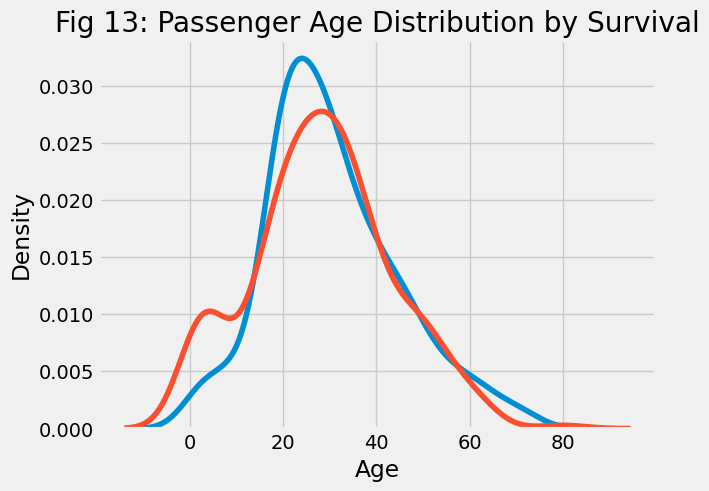

In [ ]:
sns.kdeplot(train['Age'][train['Survived']==0], label ='Didnt Survive')
sns.kdeplot(train['Age'][train['Survived']==1], label ='Survived')
#plt.lable('Age')
plt.title('Fig 13: Passenger Age Distribution by Survival')

Passengers of younger ages are more loikely to surviuve
coz they were prioritised during evacuation

In [ ]:
#N.var=Fare
train['SibSp'].isnull().sum()

0

Text(0.5, 1.0, 'Fig 14: Passenger Fare Distribution')

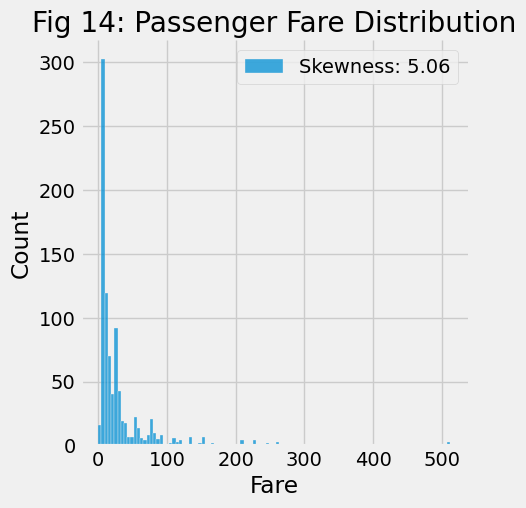

In [ ]:
sns.displot(train['Fare'],label = 'Skewness: %.2f'%(train['Fare'].skew()))
plt.legend(loc='best')
plt.title('Fig 14: Passenger Fare Distribution')

Fare has high skewness. this issue will be addressed later using log transformations

**DATA PROCESSING**

req to make our dataset ready for model training.

STEPS:

1. Drop and fill missing vals
2. Data transformation(log trfmtn)
3. Feature Engineering
4. Feature Encoding



step1

In [ ]:
# dropping missing vals
train = train.drop(['Ticket','Cabin'], axis = 1)
test = test.drop(['Ticket','Cabin'], axis = 1)

In [ ]:
#checking for missing vals
train.isnull().sum().sort_values(ascending = False)

Age            170
Embarked         2
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Fare             0
dtype: int64

In [ ]:
#most freq val of embarked in the training set
mode = train['Embarked'].dropna().mode()
mode

0    S
Name: Embarked, dtype: object

In [ ]:
#filling missing vals with mode
train['Embarked'].fillna(mode,inplace=True)
test['Embarked'].fillna(mode, inplace=True)

In [ ]:
#checking remaning missing vals and printing it in asc order
test.isnull().sum().sort_values(ascending=False)

Age            177
Embarked         2
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Fare             0
dtype: int64

In [ ]:
#for fare
median = test['Fare'].dropna().median()
median

14.4542

In [ ]:
#filling missing vals wid median
train['Fare'].fillna(mode,inplace=True)
test['Fare'].fillna(mode, inplace=True)
#checking remaning missing vals and printing it in asc order
test.isnull().sum().sort_values(ascending=False)

Age            177
Embarked         2
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Fare             0
dtype: int64

In [ ]:
#combining training and testing data sets -> concat func
combine = pd.concat([train , test], axis = 0).reset_index(drop = True)
combine.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S


In [ ]:
#Missing vals int he combined dataset
combine.isnull().sum().sort_values(ascending = False)

Age            347
Embarked         4
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Fare             0
dtype: int64

In [ ]:
#convert sex to numerical val
combine['Sex'] = combine['Sex'].map({'male':0, 'female':1})

<function matplotlib.style.core.use(style)>

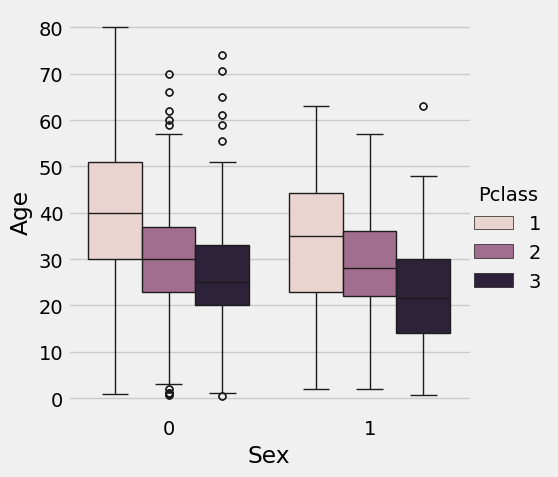

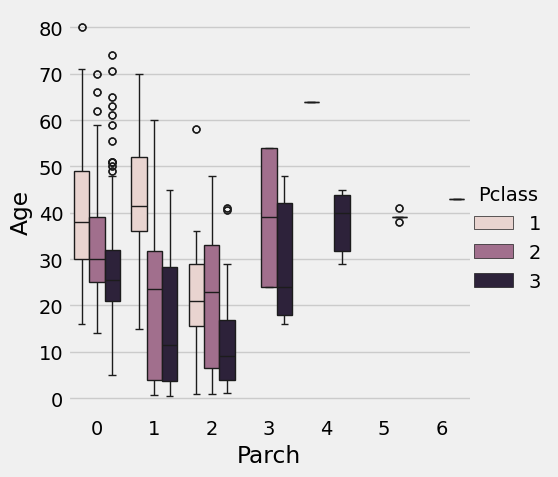

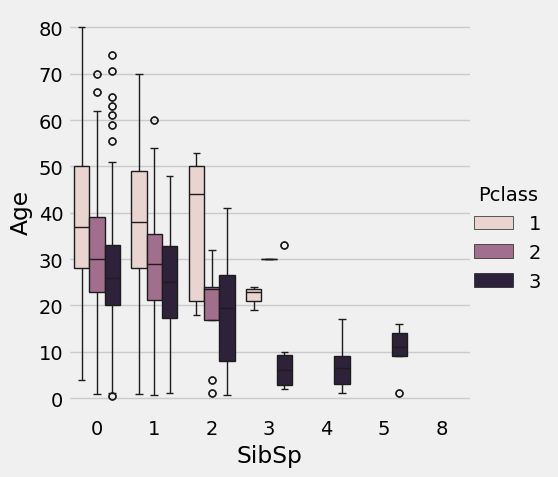

In [ ]:
sns.catplot(y= 'Age', x='Sex',hue ='Pclass', kind = 'box', data = combine)
sns.catplot(y= 'Age', x='Parch',hue ='Pclass', kind = 'box', data = combine)
sns.catplot(y= 'Age', x='SibSp',hue ='Pclass', kind = 'box', data = combine)
plt.style.use

In [ ]:
#no. of missing ages
age_nan_indices = list(combine[combine['Age'].isnull()].index)
len(age_nan_indices)

347

In [ ]:
#loop thru list and impute missing ages
for index in age_nan_indices:
  median_age = combine['Age'].median()
  predict_age = combine['Age'][(combine['SibSp'] == combine.iloc[index]['SibSp'])
                              &(combine['Parch'] == combine.iloc[index]['Parch'])
                              &(combine['Pclass'] == combine.iloc[index]['Pclass'])].median()

  if np.isnan(predict_age):
    combine['Age'].iloc[index] = median_age
  else:
    combine['Age'].iloc[index] = predict_age

In [ ]:
#make sure no missing age vals
combine['Age'].isnull().sum()

0

step 2 very high skewness -> log trfmtn using lambda func

In [ ]:
combine['Fare'] = combine['Fare'].map(lambda x: np.log(x) if x > 0 else 0)

<ipython-input-66-b5d0447ffb54>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(combine['Fare'],label = 'Skewness : %.2f'%(combine['Fare'].skew()))


Text(0.5, 1.0, 'Passenger Fare Distribution After Log Transformation')

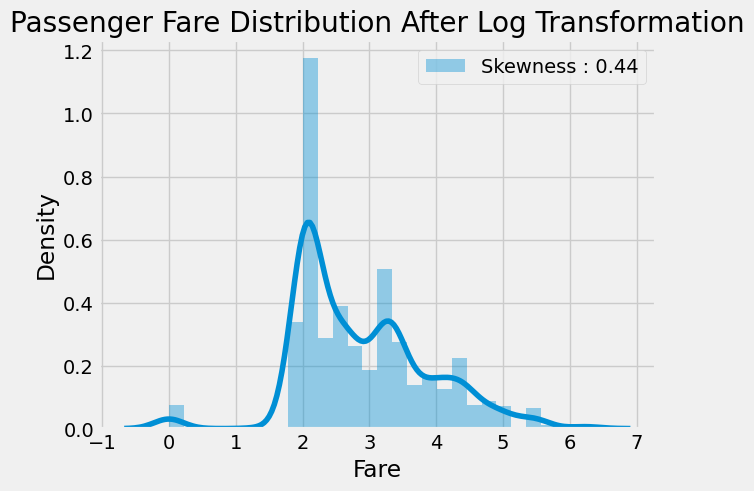

In [ ]:
#Passenger fare dist after log trfmtn
sns.distplot(combine['Fare'],label = 'Skewness : %.2f'%(combine['Fare'].skew()))
plt.legend(loc = 'best')
plt.title('Passenger Fare Distribution After Log Transformation')

Step 3

 FEATURE ENGG. -> creating new features from existing ft.- better identify underlying pblm - improve model accuracy on unseen data
will be constructing 3 new ft. -Title,IsAlone,Age*Class

In [ ]:
#Title
combine.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,1.981001,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,4.266662,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,2.070022,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,3.972177,S
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,2.085672,S


In [ ]:
#get title from Name
combine['Title'] = [name.split(',')[1].split('.')[0].strip() for name in combine['Name']]
combine[['Name','Title']].head()

,Name,Title
0,"Braund, Mr. Owen Harris",Mr
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",Mrs
2,"Heikkinen, Miss. Laina",Miss
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",Mrs
4,"Allen, Mr. William Henry",Mr


In [ ]:
combine['Title'].value_counts()

Title
Mr              1030
Miss             359
Mrs              250
Master            79
Dr                14
Rev               12
Mlle               4
Major              4
Col                4
the Countess       2
Capt               2
Ms                 2
Sir                2
Lady               2
Mme                2
Don                2
Jonkheer           2
Name: count, dtype: int64

In [ ]:
combine['Title'].nunique()

17

In [ ]:
#simplify title
combine['Title'] = combine['Title'].replace(['Dr','Rev','Col','Major','Lady','Jonkheer','Don','Capt','the Countess','Sir','Dona'],'Rare')
combine['Title'] = combine['Title'].replace(['Mlle','Ms'],'Miss')
combine['Title'] = combine['Title'].replace(['Mme'],'Mrs')

<Axes: xlabel='count', ylabel='Title'>

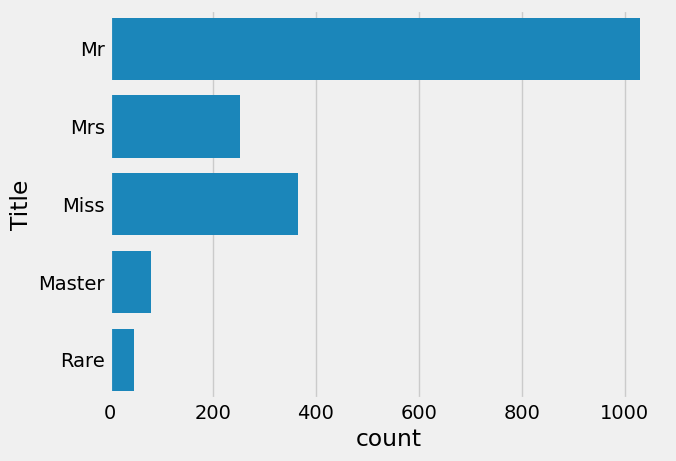

In [ ]:
sns.countplot(combine['Title'])

In [ ]:
#mean of survival by name title
combine[['Title','Survived']].groupby(['Title'], as_index =False).mean().sort_values(by='Survived',ascending = False)

,Title,Survived
3,Mrs,0.793651
1,Miss,0.706849
0,Master,0.582278
4,Rare,0.347826
2,Mr,0.157282


<ipython-input-74-f9902054a164>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x ='Title',y = 'Survived',data = combine, kind ='bar',palette=color)


Text(0.5, 1.0, 'Mean of Survival by title')

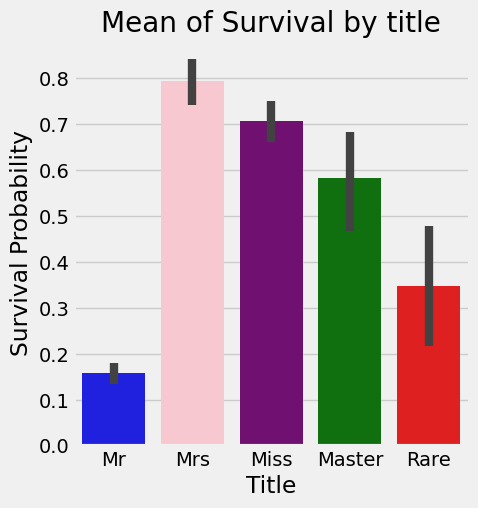

In [ ]:
color=['blue','pink','purple','green','red']
sns.catplot(x ='Title',y = 'Survived',data = combine, kind ='bar',palette=color)
plt.ylabel('Survival Probability')
plt.title('Mean of Survival by title')

In [ ]:
#drop name col
combine = combine.drop('Name',axis =1)
combine.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,0,22.0,1,0,1.981001,S,Mr
1,2,1,1,1,38.0,1,0,4.266662,C,Mrs
2,3,1,3,1,26.0,0,0,2.070022,S,Miss
3,4,1,1,1,35.0,1,0,3.972177,S,Mrs
4,5,0,3,0,35.0,0,0,2.085672,S,Mr


In [ ]:
#IsAlone-> calc family size
combine['familySize']= combine['SibSp']+ combine['Parch']+ 1
combine[['SibSp','Parch','familySize']].head(10)

,SibSp,Parch,familySize
0,1,0,2
1,1,0,2
2,0,0,1
3,1,0,2
4,0,0,1
5,0,0,1
6,0,0,1
7,3,1,5
8,0,2,3
9,1,0,2


In [ ]:
#mean of surv. by fam. size
combine[['familySize','Survived']].groupby('familySize',as_index = False).mean().sort_values(by='Survived',ascending = False)

,familySize,Survived
3,4,0.724138
2,3,0.578431
1,2,0.552795
6,7,0.333333
0,1,0.303538
4,5,0.200000
5,6,0.097561
7,8,0.000000
8,11,0.000000


In [ ]:
#create IsAlone ft.
combine['IsAlone'] =0
combine[['IsAlone','Survived']].groupby('IsAlone',as_index =False).mean().sort_values(by = 'Survived', ascending =False)

,IsAlone,Survived
0,0,0.384876


In [ ]:
#Drop SibSp,Parch and famSize
combine = combine.drop(['SibSp','Parch','familySize'], axis = 1)
combine.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone
0,1,0,3,0,22.0,1.981001,S,Mr,0
1,2,1,1,1,38.0,4.266662,C,Mrs,0
2,3,1,3,1,26.0,2.070022,S,Miss,0
3,4,1,1,1,35.0,3.972177,S,Mrs,0
4,5,0,3,0,35.0,2.085672,S,Mr,0


In [ ]:
# Age*Class
#change age into an ordinal var -> has intrinsic  ordering in their vals
#we  will separate age into 5 catagories and assign a no to each age band
combine['AgeBand'] = pd.cut(combine['Age'],5)
combine[['AgeBand','Survived']].groupby('AgeBand',as_index = False).mean().sort_values(by = 'AgeBand')

,AgeBand,Survived
0,"(0.34, 16.336]",0.518868
1,"(16.336, 32.252]",0.342324
2,"(32.252, 48.168]",0.412844
3,"(48.168, 64.084]",0.434783
4,"(64.084, 80.0]",0.090909


In [ ]:
#assign ordinals to each age band
combine.loc[combine['Age'] <= 16.136,'Age'] = 0
combine.loc[(combine['Age'] >16.136) & (combine['Age'] <= 32.102),'Age'] = 1
combine.loc[(combine['Age'] >32.102) & (combine['Age'] <= 48.068),'Age'] = 2
combine.loc[(combine['Age'] >48.068) & (combine['Age'] <= 64.034),'Age'] = 3
combine.loc[combine['Age'] >64.034, 'Age'] = 4

In [ ]:
#drop age band ft.
combine = combine.drop('AgeBand', axis = 1)

In [ ]:
#Age and Pclass data types
combine[['Age','Pclass']].dtypes

Age       float64
Pclass      int64
dtype: object

In [ ]:
#convert ordinal age into int
combine['Age'] = combine['Age'].astype('int')
combine['Age'].dtype

dtype('int64')

In [ ]:
#create Age*Class ft
combine['Age*Class'] = combine['Age'] * combine['Pclass']
combine[['Age','Pclass','Age*Class']].head()

,Age,Pclass,Age*Class
0,1,3,3
1,2,1,2
2,1,3,3
3,2,1,2
4,2,3,6


Step 4: Ft. encoding
ML models req al ip and op to be num values. therefore we req to encode all catagorical dat
pre v encoded sec col | 0=male,1=female
we req to repeat this for title,Embark
and
Fare col-> ordinal var

In [ ]:
combine.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,1,0,3,0,1,1.981001,S,Mr,0,3
1,2,1,1,1,2,4.266662,C,Mrs,0,2
2,3,1,3,1,1,2.070022,S,Miss,0,3
3,4,1,1,1,2,3.972177,S,Mrs,0,2
4,5,0,3,0,2,2.085672,S,Mr,0,6


In [ ]:
#use get_dummies -> encode title nad embarked ft.
combine = pd.get_dummies(combine, columns = ['Title'])
combine = pd.get_dummies(combine, columns = ['Embarked'],prefix = 'Em')
combine.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,IsAlone,Age*Class,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Rare,Em_C,Em_Q,Em_S
0,1,0,3,0,1,1.981001,0,3,False,False,True,False,False,False,False,True
1,2,1,1,1,2,4.266662,0,2,False,False,False,True,False,True,False,False
2,3,1,3,1,1,2.070022,0,3,False,True,False,False,False,False,False,True
3,4,1,1,1,2,3.972177,0,2,False,False,False,True,False,False,False,True
4,5,0,3,0,2,2.085672,0,6,False,False,True,False,False,False,False,True


In [ ]:
#div fare into 4 bands using pds cut func
combine['FareBand'] = pd.cut(combine['Fare'],4)
combine[['FareBand','Survived']].groupby('FareBand',as_index = False).mean().sort_values(by = 'FareBand')

,FareBand,Survived
0,"(-0.00624, 1.56]",0.062500
1,"(1.56, 3.119]",0.288719
2,"(3.119, 4.679]",0.510924
3,"(4.679, 6.239]",0.747475


In [ ]:
#assign ordinal to each fare bamd
combine.loc[combine['Fare'] <= 1.56,'Fare'] = 0
combine.loc[(combine['Fare'] >1.56) & (combine['Fare'] <= 3.119),'Fare'] = 1
combine.loc[(combine['Fare'] >3.119) & (combine['Fare'] <= 4.679),'Fare'] = 2
combine.loc[combine['Fare'] >4.679, 'Fare'] = 3

In [ ]:
#fare to int
combine['Fare'] = combine['Fare'].astype('int')

In [ ]:
#drop fareband ft.
combine = combine.drop('FareBand',axis = 1)

In [ ]:
combine.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,IsAlone,Age*Class,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Rare,Em_C,Em_Q,Em_S
0,1,0,3,0,1,1,0,3,False,False,True,False,False,False,False,True
1,2,1,1,1,2,2,0,2,False,False,False,True,False,True,False,False
2,3,1,3,1,1,1,0,3,False,True,False,False,False,False,False,True
3,4,1,1,1,2,2,0,2,False,False,False,True,False,False,False,True
4,5,0,3,0,2,1,0,6,False,False,True,False,False,False,False,True


In [ ]:
#separate training set and test set from the combine df
train = combine[:len(train)]
test = combine[len(train):]

In [ ]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,IsAlone,Age*Class,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Rare,Em_C,Em_Q,Em_S
0,1,0,3,0,1,1,0,3,False,False,True,False,False,False,False,True
1,2,1,1,1,2,2,0,2,False,False,False,True,False,True,False,False
2,3,1,3,1,1,1,0,3,False,True,False,False,False,False,False,True
3,4,1,1,1,2,2,0,2,False,False,False,True,False,False,False,True
4,5,0,3,0,2,1,0,6,False,False,True,False,False,False,False,True


In [ ]:
#drop PassId from training set
train = train.drop('PassengerId',axis = 1)
train.head()

,Survived,Pclass,Sex,Age,Fare,IsAlone,Age*Class,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Rare,Em_C,Em_Q,Em_S
0,0,3,0,1,1,0,3,False,False,True,False,False,False,False,True
1,1,1,1,2,2,0,2,False,False,False,True,False,True,False,False
2,1,3,1,1,1,0,3,False,True,False,False,False,False,False,True
3,1,1,1,2,2,0,2,False,False,False,True,False,False,False,True
4,0,3,0,2,1,0,6,False,False,True,False,False,False,False,True


In [ ]:
#convert survived back to itn in training dataset
train['Survived'] = train['Survived'].astype('int')
train.head()

,Survived,Pclass,Sex,Age,Fare,IsAlone,Age*Class,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Rare,Em_C,Em_Q,Em_S
0,0,3,0,1,1,0,3,False,False,True,False,False,False,False,True
1,1,1,1,2,2,0,2,False,False,False,True,False,True,False,False
2,1,3,1,1,1,0,3,False,True,False,False,False,False,False,True
3,1,1,1,2,2,0,2,False,False,False,True,False,False,False,True
4,0,3,0,2,1,0,6,False,False,True,False,False,False,False,True


In [ ]:
#drop Passg survived col from test set
test = test.drop('Survived',axis = 1)
test.head()

,PassengerId,Pclass,Sex,Age,Fare,IsAlone,Age*Class,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Rare,Em_C,Em_Q,Em_S
881,1,3,0,1,1,0,3,False,False,True,False,False,False,False,True
882,2,1,1,2,2,0,2,False,False,False,True,False,True,False,False
883,3,3,1,1,1,0,3,False,True,False,False,False,False,False,True
884,4,1,1,2,2,0,2,False,False,False,True,False,False,False,True
885,5,3,0,2,1,0,6,False,False,True,False,False,False,False,True


**MODELLING**

using models from Scikit-learn, a lib for ML in python

Titanic is a classification pblm, therefore we need classificatn models  aka classifiers such as
* SVM
*   Logistic reg.
*   KNN
*   Gausian Naivw bayes
*   Perceptron
*   Linear SVC
*   Stochastic  gradient descent
*   Decision tree
*   Random forest
*   CatBoost










In [ ]:
# step 1 : split training data
p_train = train.drop('Survived', axis = 1) #independent variable
q_train = train['Survived'] #dependent /response var
p_test = test.drop('PassengerId',axis = 1).copy()
print("p_train shape: ", p_train.shape)
print("q_train shape: ", q_train.shape)
print("p_test shape: ", p_test.shape)

p_train shape:  (881, 14)
q_train shape:  (881,)
p_test shape:  (891, 14)


step 2 : fit model to make perd = initiate the model -> fit to training dataset -> predict data in test set


In [ ]:
#logistic reg
logreg = LogisticRegression()
logreg.fit(p_train,q_train)
q_pred = logreg.predict(p_test)
acc_log = round(logreg.score(p_train, q_train)*100, 2)
acc_log

80.36

In [ ]:
#SVM
svc = SVC()
svc.fit(p_train, q_train)
q_pred = svc.predict(p_test)
acc_svc = round(svc.score(p_train, q_train)*100,2)
acc_svc

83.2

In [ ]:
#KNN
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(p_train, q_train)
p_pred = knn.predict(p_test)
acc_knn = round(knn.score(p_train, q_train)*100,2)
acc_knn

83.77

In [ ]:
#Gaussian Navies bayes
gaussian = GaussianNB()
gaussian.fit(p_train, q_train)
q_pred = gaussian.predict(p_test)
acc_gaussian = round(gaussian.score(p_train, q_train)*100,2)
acc_gaussian

79.0

In [ ]:
#perceptron
perceptron = Perceptron()
perceptron.fit(p_train, q_train)
q_pred = perceptron.predict(p_test)
acc_perceptron = round(perceptron.score(p_train, q_train)*100,2)
acc_perceptron

76.05

In [ ]:
#stochastic grad des
sgd = SGDClassifier()
sgd.fit(p_train, q_train)
q_pred = sgd.predict(p_test)
acc_sgd = round(sgd.score(p_train, q_train)*100, 2)
acc_sgd

81.16

In [ ]:
#Linear SVC
linear_svc = LinearSVC()
linear_svc.fit(p_train, q_train)
q_pred = linear_svc.predict(p_test)
acc_linear_svc = round(linear_svc.score(p_train, q_train)*100,2)
acc_linear_svc

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


80.93

In [ ]:
#Decision tree
dt = DecisionTreeClassifier()
dt.fit(p_train,q_train)
q_pred = dt.predict(p_test)
acc_dt = round(dt.score(p_train, q_train)*100,2)
acc_dt

85.36

In [ ]:
#Random forest
rforest = RandomForestClassifier(n_estimators = 100)
rforest.fit(p_train, q_train)
q_pred = rforest.predict(p_test)
acc_rforest = round(rforest.score(p_train, q_train)*100,2)
acc_rforest

85.36

In [ ]:
#CatBoost
catboost = CatBoostClassifier()
catboost.fit(p_train, q_train)
q_pred = catboost.predict(p_test)
acc_catboost = round(catboost.score(p_train, q_train)*100,2)

Learning rate set to 0.00976
0:	learn: 0.6859184	total: 53.2ms	remaining: 53.1s
1:	learn: 0.6796915	total: 54.2ms	remaining: 27s
2:	learn: 0.6747976	total: 54.9ms	remaining: 18.2s
3:	learn: 0.6693422	total: 55.7ms	remaining: 13.9s
4:	learn: 0.6639167	total: 56.5ms	remaining: 11.3s
5:	learn: 0.6578050	total: 57.4ms	remaining: 9.5s
6:	learn: 0.6515922	total: 58.2ms	remaining: 8.26s
7:	learn: 0.6453751	total: 59.1ms	remaining: 7.32s
8:	learn: 0.6393488	total: 67.8ms	remaining: 7.47s
9:	learn: 0.6348020	total: 71.9ms	remaining: 7.12s
10:	learn: 0.6291135	total: 73.6ms	remaining: 6.62s
11:	learn: 0.6255938	total: 75.2ms	remaining: 6.19s
12:	learn: 0.6217410	total: 76.6ms	remaining: 5.81s
13:	learn: 0.6166773	total: 78.2ms	remaining: 5.51s
14:	learn: 0.6117444	total: 79.8ms	remaining: 5.24s
15:	learn: 0.6063153	total: 81.6ms	remaining: 5.02s
16:	learn: 0.6036343	total: 83.2ms	remaining: 4.81s
17:	learn: 0.5991117	total: 84.7ms	remaining: 4.62s
18:	learn: 0.5948204	total: 86.4ms	remaining: 4.

In [ ]:
acc_catboost

85.13

**MODEL EVALUATION AND HYPERPARAMETER TUNING**

training accuracy ->
K-fild cross validation(subset of training set is reserved for testing purposes)

In [ ]:
#training acc.
models = pd.DataFrame({'Model' :['Support Vector Machines','KNN','Logistic Regression','Random Forest','Navies Bayes','Perceptron','Stochatic Descent','Linear SVC', 'Decision Tree',' CatBoost'],
                       'Score' :[acc_svc,acc_knn,acc_log,acc_rforest,acc_gaussian,acc_perceptron,acc_sgd,acc_linear_svc,acc_dt,acc_catboost]})
models.sort_values(by = 'Score',ascending = False, ignore_index=True)

,Model,Score
0,Random Forest,85.36
1,Decision Tree,85.36
2,CatBoost,85.13
3,KNN,83.77
4,Support Vector Machines,83.20
5,Stochatic Descent,81.16
6,Linear SVC,80.93
7,Logistic Regression,80.36
8,Navies Bayes,79.00
9,Perceptron,76.05


In [ ]:
#K-FOLD CROSS VALIDATION
#list with some useful classifires for this purpose
classifiers = []
classifiers.append(LogisticRegression())
classifiers.append(SVC())
classifiers.append(KNeighborsClassifier(n_neighbors = 5))
classifiers.append(GaussianNB())
classifiers.append(Perceptron())
classifiers.append(LinearSVC())
classifiers.append(SGDClassifier())
classifiers.append(DecisionTreeClassifier())
classifiers.append(RandomForestClassifier())
classifiers.append(CatBoostClassifier())
len(classifiers)

10

In [ ]:
#performing K-fold c.v by looping thru each classifier
cv_results = []
for classifier in classifiers:
  cv_results.append(cross_val_score(classifier, p_train, q_train, scoring = 'accuracy',  cv = 10))

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  w

Streaming output truncated to the last 5000 lines.
4:	learn: 0.6654222	total: 4.42ms	remaining: 880ms
5:	learn: 0.6595949	total: 5.23ms	remaining: 867ms
6:	learn: 0.6549554	total: 6.09ms	remaining: 864ms
7:	learn: 0.6504613	total: 6.77ms	remaining: 839ms
8:	learn: 0.6444787	total: 7.36ms	remaining: 810ms
9:	learn: 0.6392255	total: 8.2ms	remaining: 812ms
10:	learn: 0.6333061	total: 9.52ms	remaining: 856ms
11:	learn: 0.6288540	total: 11ms	remaining: 909ms
12:	learn: 0.6254806	total: 12.1ms	remaining: 918ms
13:	learn: 0.6206553	total: 12.8ms	remaining: 902ms
14:	learn: 0.6152771	total: 13.8ms	remaining: 906ms
15:	learn: 0.6103197	total: 14.8ms	remaining: 910ms
16:	learn: 0.6059474	total: 15.8ms	remaining: 914ms
17:	learn: 0.6028132	total: 16.7ms	remaining: 914ms
18:	learn: 0.5988805	total: 17.8ms	remaining: 917ms
19:	learn: 0.5946618	total: 18.7ms	remaining: 919ms
20:	learn: 0.5908231	total: 19.7ms	remaining: 921ms
21:	learn: 0.5861186	total: 20.8ms	remaining: 923ms
22:	learn: 0.5825865	t

In [ ]:
#mean and SD of the c.v result for each classifier
cv_mean = []
cv_std = []
for cv_result in cv_results:
  cv_mean.append(cv_result.mean())
  cv_std.append(cv_result.std())

In [ ]:
cv_res = pd.DataFrame({'Cross Validation Mean': cv_mean,
                       'Cross Validation Std': cv_std,
                       'Algorithm':['Logiatic Regression','Support Vector Machine', 'KNN','Pearceptron','CatBoost','Random forest',' Decision Tree','Linear SVC','Gaussian Navies Bayaes',' stochastic Gradient Decent']})
cv_res.sort_values(by = 'Cross Validation Mean', ascending = False, ignore_index = True)

,Cross Validation Mean,Cross Validation Std,Algorithm
0,0.827490,0.042052,KNN
1,0.826366,0.043871,stochastic Gradient Decent
2,0.821821,0.041474,Gaussian Navies Bayaes
3,0.821782,0.042574,Support Vector Machine
4,0.816139,0.035738,Linear SVC
5,0.799119,0.039872,Random forest
6,0.795697,0.029108,Logiatic Regression
7,0.785483,0.044077,Pearceptron
8,0.751443,0.092307,Decision Tree
9,0.727617,0.069333,CatBoost


In [ ]:
#Hyperparamenter Tuning
param_grid = {'C' : [0.1,1,10,100,1000],
              'gamma': [1,0.1,0.001,0.0001],
              'kernel':['rbf']}

grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)
grid.fit(p_train, q_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.802 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.841 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.801 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.778 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.807 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.797 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.812 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.784 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.761 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.812 total time=   0.0s
[CV 1/5] END ....C=0.1, gamma=0.001, kernel=rbf;, score=0.616 total time=   0.0s
[CV 2/5] END ....C=0.1, gamma=0.001, kernel=rbf

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.001, 0.0001], 'kernel': ['rbf']},
             verbose=3)

In [ ]:
print('Best parameters: ',grid.best_params_)
print('Best estimator: ',grid.best_estimator_)

Best parameters:  {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
Best estimator:  SVC(C=10, gamma=0.1)


In [ ]:
svc = SVC(C = 100, gamma = 0.01,kernel = 'rbf')
svc.fit(p_train,q_train)
q_pred =  svc.predict(p_test)
acc_svc = round(svc.score(p_train,q_train)*100,2)
print('SVC Training accuracy: ',acc_svc)

SVC Training accuracy:  83.54


In [ ]:
print('Mean Cross Validation: ',cross_val_score(svc,p_train,q_train,scoring = 'accuracy',cv = 10).mean())
print('Our Cross validation score has improved slightly')

Mean Cross Validation:  0.8342696629213483
Our Cross validation score has improved slightly


In [ ]:
#Survival pred using Support vector Classifier
q_pred

array([0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1,

In [ ]:
#final data frame
submit = pd.DataFrame({'PassengerId': test['PassengerId'],'Survived':q_pred})
submit.head()

,PassengerId,Survived
881,1,0
882,2,1
883,3,1
884,4,1
885,5,0
